# Spin Wave Simulation

Instrument: ARCS
* Ei=150meV
* Fermi chopper: ? Hz
* T0: 90Hz
 
Sample: SLAF tetragonal model
* lattice parameters: 5 5 5        90 90 90
* spin wave model available in paper: "Dynamical structure factor of quasi-two-dimensional antiferromagnet in high fields"
* Orientation: u,v = [1 0 2] and  [1 0 0]
* psi angles: -90, 90, step 3


## Step 0. some goodies

In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

## Step 1. create dir structure

In [2]:
# Define which directory to use for my simulation
workdir = "/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/"

In [3]:
# change into primary simulation directory
%cd {workdir}
!ls

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2
samples    samples_4  samples_6   scattering_2	scattering_4  scattering_6
samples_3  samples_5  scattering  scattering_3	scattering_5


In [4]:
!source ~lj7/.use-miniconda2
!source activate mcvine

discarding /SNS/users/lj7/software/miniconda2/envs/mcvine/bin from PATH
prepending /SNS/users/lj7/software/miniconda2/envs/mcvine/bin to PATH


## Step 2. obtain beam simulation

In [4]:
%cd {workdir}/scattering_6

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_6


In [9]:
!ln -s /SNS/users/p63/mcvine/research/beams/beam_150meV_1e9_neutrons/ beam
!ls -l

total 1088
lrwxrwxrwx 1 p63 users     62 Jul 19 11:47 beam -> /SNS/users/p63/mcvine/research/beams/beam_150meV_1e9_neutrons/
-rw-r--r-- 1 p63 users 717818 Jul 19 11:46 SLAF-tetragonal-model-v6.ipynb


## Step 3. Check/Update sample assembly

In [10]:
!cp -r {workdir}/samples {workdir}/samples_6

In [11]:
%cd "{workdir}/samples_6/X/sampleassembly"

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/samples_6/X/sampleassembly


In [12]:
!cat X.xyz

8
5 0 0    0 5 0    0 0 5
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0

Note:  xyz data only important for phonon scattering (I think)

In [13]:
!cat X-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    h:=a*Qx/twopi; k:=b*Qy/twopi; l:=c*Qz/twopi; alpha:=0.1; JS:=5.0; Hnorm:=0.9;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)))"
	S_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    alpha:=0.1; JS:=5.0; Hnorm:=0.9; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*E

In [14]:
%%file ./X-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9; a:=5; b:=5; c:=5;
    theta:=asin(Hnorm);
    gamma_z:=cos(c*Qz); gamma_xy:=(cos(a*Qx)+cos(b*Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)))"
	S_Q="pi:=3.1415926535897932; a:=5; b:=5; c:=5;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9; theta:=asin(Hnorm);
    gamma_z:=cos(c*Qz); gamma_xy:=(cos(a*Qx)+cos(b*Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    Eeff:=max(Eq,1.5);
    UqSquared:=(Aq+Eeff)/(2.0*Eeff); VqSquared:=(Aq-Eeff)/(2.0*Eeff);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sxoxo:=Sxx*(sin(theta))^2; Syoyo:=Syy;
    Sxoxo+Syoyo"
	Emax="90*meV"
	orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
	/>
    
     <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; a:=5; b:=5; c:=5;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9;
    theta:=asin(Hnorm);
    gamma_z:=cos(c*(Qz-pi)); gamma_xy:=(cos(a*(Qx-pi))+cos(b*(Qy-pi)));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)))"
	S_Q="pi:=3.1415926535897932; a:=5; b:=5; c:=5;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9; theta:=asin(Hnorm);
    gamma_z:=cos(c*(Qz-pi)); gamma_xy:=(cos(a*(Qx-pi))+cos(b*(Qy-pi)));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    Eeff:=max(Eq,1.5);
    UqSquared:=(Aq+Eeff)/(2.0*Eeff); VqSquared:=(Aq-Eeff)/(2.0*Eeff);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sxx*(cos(theta))^2"
	Emax="90*meV"
	orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
	/>   
    
  </KernelContainer>
  
</homogeneous_scatterer>


Overwriting ./X-scatterer.xml


In [15]:
a,b,c=5,5,5

from numpy import sin, cos, deg2rad
a1 = [a, 0, 0]
a2 = [0, b, 0]
a3 = [0, 0, c]

twopi = 2*np.pi
f = twopi/np.dot(a1, np.cross(a2, a3))
b1 = np.cross(a2,a3) * f
b2 = np.cross(a3,a1) * f
b3 = np.cross(a1,a2) * f
b1,b2,b3

(array([ 1.25663706,  0.        ,  0.        ]),
 array([ 0.        ,  1.25663706,  0.        ]),
 array([ 0.        ,  0.        ,  1.25663706]))

#### Orientation of the kernel
Here we need to use the convention that z is along beam, y vertical up.
The kernel has its own cartesian axis e’x e’y e’z. Because we know
u = 102 v = 100
, we have the basis vectors of the instrument coordinate system

    ez along b1 + 2*b3
    ex along b1
    

So we have them in the reciprocal cartesian axis

In [16]:
ez = b1 + 2*b3; ez /= np.linalg.norm(ez)
ex1 = b1
ey = np.cross(ez, ex1); ey/=np.linalg.norm(ey)
ex = np.cross(ey, ez)
ex, ey, ez

(array([ 0.89442719,  0.        , -0.4472136 ]),
 array([ 0.,  1.,  0.]),
 array([ 0.4472136 ,  0.        ,  0.89442719]))

The rotation matrix is define as
```
    ex.ex’ ex.ey’ ex.ez’ 
R = ey.ex’ ey.ey’ ey.ez’
    ez.ex’ ez.ey’ ez.ez’
```
So

In [14]:
R = np.array([ ex, ey, ez ])
Rflat = R.copy(); Rflat.shape = -1,
R, Rflat

(array([[ 0.89442719,  0.        , -0.4472136 ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.4472136 ,  0.        ,  0.89442719]]),
 array([ 0.89442719,  0.        , -0.4472136 ,  0.        ,  1.        ,
         0.        ,  0.4472136 ,  0.        ,  0.89442719]))

Now we add an extra kernel parameter:

In [15]:
'orientation="%s"' % (','.join(str(e) for e in Rflat),)

'orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"'

In [36]:
# modify X-scatterer.xml to specify the orientation

In [17]:
!cat X-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9; a:=5; b:=5; c:=5;
    theta:=asin(Hnorm);
    gamma_z:=cos(c*Qz); gamma_xy:=(cos(a*Qx)+cos(b*Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)))"
	S_Q="pi:=3.1415926535897932; a:=5; b:=5; c:=5;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9; theta:=asin(Hnorm);
    gamma_z:=cos(c*Qz); gamma_xy:=(cos(a*Qx)+cos(b*Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    Eeff:=max(Eq,1.5);
    UqSquared:=(Aq+Eeff)/(2.0*Eeff); VqSquared:=(Aq-Eeff)/(2.0*Eeff);
    Uq:=sqrt(UqSquared);

In [18]:
!ls

sampleassembly.xml  X-scatterer.xml  X.xyz


## Step 4. Scattering

In [4]:
%cd "{workdir}/scattering_6"

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_6


In [20]:
!ls -l

total 1152
lrwxrwxrwx 1 p63 users     62 Jul 19 11:47 beam -> /SNS/users/p63/mcvine/research/beams/beam_150meV_1e9_neutrons/
-rw-r--r-- 1 p63 users 718243 Jul 19 11:58 SLAF-tetragonal-model-v6.ipynb


In [21]:
!rsync -a ~lj7/simulations/mcvine_workflow/DGS/ARCS/single-crystal/* ./
!ls

beam  scripts  SLAF-tetragonal-model-v6.ipynb  template


In [22]:
%cd template

!ln -s ../../samples_6/X/sampleassembly

!ln -s ../beam beam

%cd ..

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_6/template
/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_6


In [5]:
%%file sim.yml

cluster:
  nodes: 10
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Overwriting sim.yml


In [46]:
# Test the simulation for a single angle

Note:  If the below simulation test fails, you must do "rm -rf work_30.0" from the terminal, within the {workdir}/scattering_4 directory, to remove all the failed simulation pieces.  Otherwise, even if you fix the problem, MCViNE will continue to fail when it sees the old "pieces" of the failed simulation

In [6]:
!./scripts/sim.py --angle=30.0

SAMPLE_ANGLE=30.0 time ./scatter &> log.scatter
time ./create-nxs &> log.create-nxs

real	1m40.743s
user	12m42.663s
sys	1m33.180s
cp sim.nxs sim-30.0.nxs
mcvine instruments arcs nxs populate_metadata --type=Ei --beam_outdir=beam/out --nxs=sim-30.0.nxs
/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine.
  warnings.warn(msg)


In [7]:
%%file sim.yml

cluster:
  nodes: 12
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Overwriting sim.yml


In [ ]:
# a script to create a submit script submit.sh
# may need to create several scripts

In [8]:
%%file create-submit.py
import numpy as np
ostream = open('submit.sh', 'wt')
for a in np.arange(-90, 90.1, 3.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

Writing create-submit.py


In [9]:
!cat create-submit.py

import numpy as np
ostream = open('submit.sh', 'wt')
for a in np.arange(-90, 90.1, 3.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

In [10]:
# run the script to create submit.sh
!python ./create-submit.py

In [42]:
# check submit script
#!cat submit.sh

In [11]:
# make sure submit.sh is executable
!chmod +x submit.sh
# and then start it script in the background

In [12]:
%%script bash --bg
./submit.sh
# this will take a while to finish.

Starting job # 0 in a separate thread.


## Step 5. Reduction

In [13]:
%cd "{workdir}/scattering_6"
!ls

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_6
beam				work_-21.0  work_-39.0	work_-6.0   work_-78.0
create-submit.py		work_21.0   work_39.0	work_6.0    work_78.0
scripts				work_-24.0  work_-42.0	work_-60.0  work_-81.0
sim.yml				work_24.0   work_42.0	work_60.0   work_81.0
SLAF-tetragonal-model-v6.ipynb	work_-27.0  work_-45.0	work_-63.0  work_-84.0
submit.sh			work_27.0   work_45.0	work_63.0   work_84.0
template			work_-3.0   work_-48.0	work_-66.0  work_-87.0
work_0.0			work_3.0    work_48.0	work_66.0   work_87.0
work_-12.0			work_-30.0  work_-51.0	work_-69.0  work_-9.0
work_12.0			work_30.0   work_51.0	work_69.0   work_9.0
work_-15.0			work_-33.0  work_-54.0	work_-72.0  work_-90.0
work_15.0			work_33.0   work_54.0	work_72.0   work_90.0
work_-18.0			work_-36.0  work_-57.0	work_-75.0
work_18.0			work_36.0   work_57.0	work_75.0


First we reduce event-mode nexus data for each angle using Mantid

In [14]:
# check if there is reduced data
!ls work_3.0/reduced*

ls: cannot access work_3.0/reduced*: No such file or directory


In [15]:
# reduce tof events to E events
# this takes about 30 minutes
!./scripts/reduce/reduceKeepingEvents_batch.py -90,90.1,3. 150 0,150,0.5 > log.reduce

In [36]:
# create configuration file for getting a slice (BIG slice--check if any data exists)

In [26]:
%%file slice_HH0_v2.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 50
 N: 100
Q_projections:
 U:
  proj: 1,1,0
  proj_name: H,H,0
  min: -2.0
  max: 2.0
  N: 400
 V:
  proj: 1,-1,0
  proj_name: H,-H,0
  min: -0.2
  max: 0.2
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -0.2
  max: 0.2
  N: 1
output: slice_HH0_v2.nxs


Writing slice_HH0_v2.yml


In [16]:
# hack for now. copy the config python file to current dir
!cp /SNS/users/lj7/simulations/mcvine_workflow/DGS/ARCS/single-crystal/scripts/config.py .

In [27]:
# run script to calculate the slice
# this take ~15 minutes 
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_HH0_v2.yml > log.slice_HH0_v2

In [31]:
!./scripts/reduce/slice2hist.py "slice_HH0_v2.nxs" slice_HH0_v2.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.88 seconds


plot z in (0.0, 6.06959235339e-06)


<IPython.core.display.Javascript object>


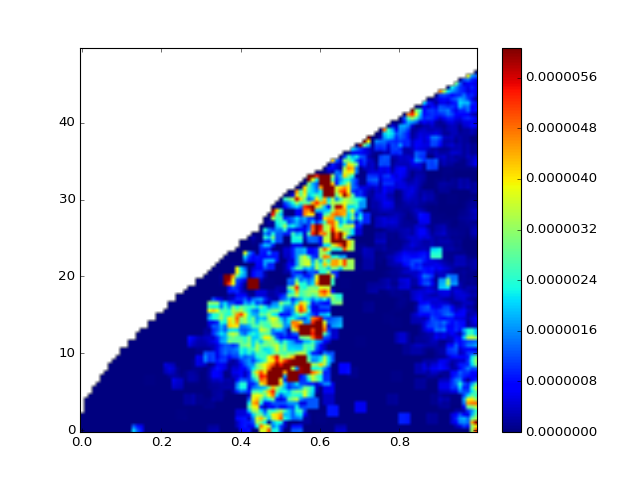

In [71]:
H.plot(hh.load("./slice_HH0.h5"), min=0.0)

In [45]:
# Now try slicing along the M -> X path

In [46]:
%%file slice_MtoX_v4.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 50
 N: 100
Q_projections:
 U:
  proj: 0,1,0
  proj_name: 0,K,0
  min: -1.0
  max: 1.0
  N: 120
 V:
  proj: 1,0,0
  proj_name: H,0,0
  min: 0.25
  max: 0.75
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -0.25
  max: 0.25
  N: 1
output: slice_MtoX_v4.nxs

Writing slice_MtoX_v4.yml


In [47]:
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_MtoX_v4.yml > log.slice_MtoX_v4

In [61]:
!./scripts/reduce/slice2hist.py "slice_MtoX_v4.nxs" slice_MtoX_v4.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.86 seconds


plot z in (0, 5.72611859696e-06)


<IPython.core.display.Javascript object>


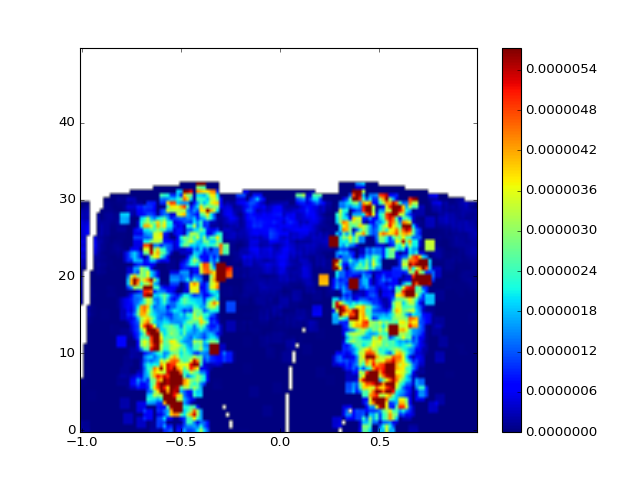

In [49]:
H.plot(hh.load("./slice_MtoX_v4.h5"), min=0)

In [50]:
# Try for X -> X'

In [52]:
%%file slice_XtoXp.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 50
 N: 100
Q_projections:
 U:
  proj: 1,-1,0
  proj_name: H,-H,0
  min: -1.0
  max: 1.0
  N: 100
 V:
  proj: 1,1,0
  proj_name: H,H,0
  min: 0.0
  max: 0.5
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -0.25
  max: 0.25
  N: 1
output: slice_XtoXp.nxs


Overwriting slice_XtoXp.yml


In [53]:
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_XtoXp.yml > log.slice_XtoXp

In [54]:
!./scripts/reduce/slice2hist.py "slice_XtoXp.nxs" slice_XtoXp.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 3.24 seconds


plot z in (0, 7.52296313173e-06)


<IPython.core.display.Javascript object>


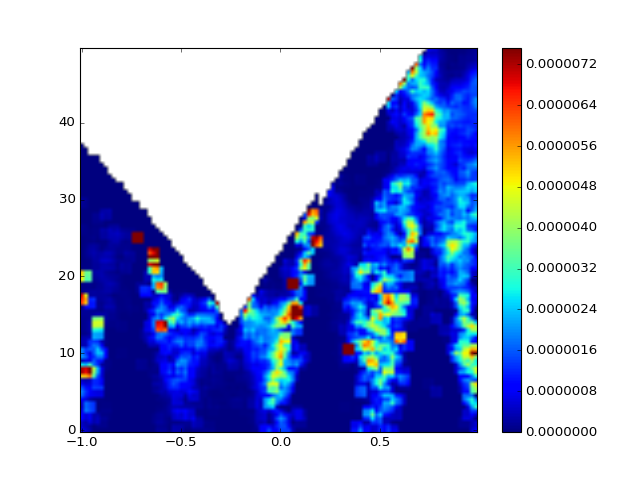

In [55]:
H.plot(hh.load("./slice_XtoXp.h5"), min=0)

Now X' -> Gamma

In [65]:
%%file slice_XpToG_v3.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 50
 N: 100
Q_projections:
 U:
  proj: 0,1,0
  proj_name: 0,K,0
  min: 0.0
  max: 1.0
  N: 60
 V:
  proj: 1,0,0
  proj_name: H,0,0
  min: -0.3
  max: 0.3
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -0.3
  max: 0.3
  N: 1
output: slice_XpToG_v3.nxs

Writing slice_XpToG_v3.yml


In [66]:
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_XpToG_v3.yml > log.slice_XpToG_v3

In [67]:
!./scripts/reduce/slice2hist.py "slice_XpToG_v3.nxs" slice_XpToG_v3.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.86 seconds


plot z in (0, 1.50897974079e-06)


<IPython.core.display.Javascript object>


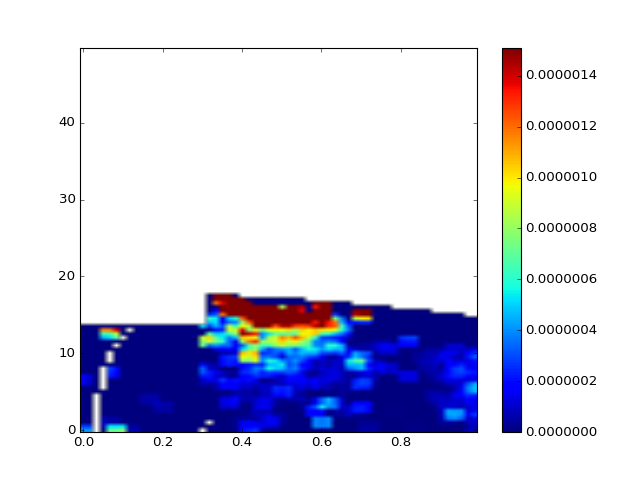

In [68]:
H.plot(hh.load("./slice_XpToG_v3.h5"), min=0)